# Attention is all you need

### 1. Introduction to the Transformer Architecture


The Transformer model, introduced by Vaswani et al. in their seminal paper "Attention is All You Need," represents a significant shift in the approach to sequence transduction tasks such as machine translation. Prior to the Transformer, most state-of-the-art models relied on [recurrent neural networks (RNNs)](https://en.wikipedia.org/wiki/Recurrent_neural_network), [long short-term memory (LSTM)](https://en.wikipedia.org/wiki/Long_short-term_memory) networks, or [convolutional neural networks (CNNs)](https://en.wikipedia.org/wiki/Convolutional_neural_network), which inherently processed data sequentially. This sequential dependency limited parallelization capabilities, which in turn constrained training and inference speeds as well as scalability.

The Transformer model was designed to overcome these limitations by relying entirely on attention mechanisms, without recurrence or convolutions. This design allows for significantly more parallelization throughout the model, enabling faster training and greater efficiency. Moreover, attention mechanisms provide the Transformer with the ability to weigh the importance of different words within the input sequence, regardless of their positional distances from each other, leading to better handling of long-range dependencies within the text.

### Abstract
The essence of the Transformer model is highlighted by its departure from traditional sequence transduction models that heavily rely on recurrent or convolutional neural networks. Instead, the Transformer utilizes a novel attention architecture. This shift allows for significant improvements:

- **Superior Performance**: The model achieves state-of-the-art performance on translation tasks, as demonstrated by its BLEU scores. [BLEU Bilingual Evaluation Understudy](https://en.wikipedia.org/wiki/BLEU) is a metric for evaluating translated text against one or more reference translations. High BLEU scores indicate that the translations closely resemble human translations.
- **Enhanced Parallelization**: Unlike recurrent models that process data sequentially, the Transformer processes data in parallel, drastically reducing the time required for training.
- **Scalability**: The ability to train efficiently on large datasets using parallel computing resources makes the Transformer particularly well-suited for modern computational demands.

### Introduction

The paper elaborates on the limitations inherent in existing sequence modeling approaches:

- **Sequential Data Processing**: Traditional models like RNNs and LSTMs process data sequentially, which means each step or word depends on the previous one. This sequence dependency limits the ability to train models in parallel, slowing down the training process and making it difficult to scale with increased data size.
- **Memory Constraints**: Sequential processing in models like RNNs often leads to bottlenecks at longer sequence lengths due to memory constraints and difficulty in learning dependencies between distant positions in the text (the problem of "long-range dependencies").
- **Need for a New Architecture**: The authors argue that the limitations of existing models necessitate a new architecture capable of leveraging modern computational resources more effectively. This leads to the development of the Transformer, which eliminates recurrence and relies entirely on an attention mechanism to process all positions simultaneously.

### Background

The background section reviews previous efforts to address the inefficiencies of sequence models:

- **Extended Neural GPU, ByteNet, and ConvS2S**: These models represent advances in reducing the sequential computation load by using convolutional neural networks (CNNs). Unlike RNNs, CNNs can process data in chunks, allowing for some parallelization. However, the degree of parallelization is still limited.
    - **Extended Neural GPU**: Attempts to marry the parallel processing capabilities of CNNs with the dynamic capacity of RNNs.
    - **ByteNet**: Introduces a dilation in convolutions to capture wider dependencies without increasing computational complexity linearly.
    - **ConvS2S (Convolutional Seq2Seq)**: Utilizes layers of convolutions to process sequence data, improving over standard CNNs by handling sequences more directly.
- **Inherent Limitations**: Despite these improvements, CNN-based models still struggle with the computation growing with the increase in distance between sequence positions. This limits their ability to efficiently process longer sequences.
- **Transformer's Solution**: The Transformer model overcomes these limitations by employing self-attention, which calculates the relationship between all words in a sentence, regardless of their positional distance. Each word can directly attend to every other word, leading to a constant number of operations that are independent of the sequence length.


#### Diagram and Overview

<div align="center">
    <img src="../../LLM-Images/Figure-1-The-Transformer-model-architecture.png" alt="Transformer Architecture" width="400" height="600">
</div>

**Figure 1: Transformer Model Architecture**
This diagram illustrates the complete architecture of the Transformer model, showcasing both the encoder and decoder components. Each component is built from stacks of identical layers, with key operations highlighted:
- **Encoder**: Comprises multi-head self-attention layers and position-wise fully connected feed-forward networks.
- **Decoder**: Includes multi-head self-attention layers, encoder-decoder attention layers, and position-wise fully connected feed-forward networks.

The diagram effectively encapsulates the flow of input through the model, detailing how embeddings and positional encodings are utilized to process the input and generate output.


<div align="center">
    <img src="../../LLM-Images/Figure-2-SDPA-MHA.png" alt="Transformer's architecture: the Scaled Dot-Product Attention and the Multi-Head Attention mechanisms." width="600" height="600">
</div>




**Figure 2** from the "Attention is All You Need" paper illustrates two crucial components of the Transformer's architecture: the Scaled Dot-Product Attention and the Multi-Head Attention mechanisms. These components are central to the model's ability to process sequences in parallel while capturing complex interdependencies within the data. 

### Scaled Dot-Product Attention (Left Side of Figure 2)

The Scaled Dot-Product Attention is a simple yet powerful attention mechanism that operates on a query $Q$, keys $K$, and values $V$. Here’s how it works step-by-step:

1. **Matrix Multiplication of Query and Keys**: The attention mechanism begins by calculating the dot products of the query with all keys to generate a score matrix. Each score determines the degree of attention that parts of the input should receive. The keys and queries are typically vectors of dimension $d_k$, and their matrix multiplication results in a scoring matrix of shape $[\text{number of queries}, \text{number of keys}]$.

2. **Scaling**: Each score is then scaled by dividing by $\sqrt{d_k}$, where $d_k$ is the dimensionality of the keys and queries. This scaling helps in stabilizing the gradients during training, as it prevents the scores from becoming too large, leading to sharper softmax outputs.

3. **Softmax Application**: A softmax function is applied to the scores along each row to create a probability distribution. The softmax ensures that the scores are normalized to between 0 and 1, representing the weights assigned to the values.

4. **Weighted Sum of Values**: Finally, the softmax output (attention weights) is used to compute a weighted sum of the values. The resulting output matrix has the same number of rows as $Q$ and the same number of columns as $V$, thus forming the final output of the attention step.

This mechanism allows the model to dynamically focus on different parts of the input sequence, crucial for tasks like translation where the relevance of input elements can vary significantly depending on the context.

### Multi-Head Attention (Right Side of Figure 2)

Multi-Head Attention extends the Scaled Dot-Product Attention by parallelizing the attention process across multiple "heads." Here’s how Multi-Head Attention enhances the model:

1. **Linear Projections**: Each of the queries, keys, and values is linearly projected $h$ times with different, learned linear transformations to $d_k$, $d_k$, and $d_v$ dimensions, respectively. This results in $h$ sets of queries, keys, and values, each representing a different "subspace" or "aspect" of the input information.

2. **Parallel Attention Layers**: For each projected set of queries, keys, and values, the scaled dot-product attention is applied in parallel, allowing the model to jointly attend to information from different representation subspaces.

3. **Concatenation of Outputs**: The outputs from each head are concatenated and then linearly transformed again to form the final values. This concatenation allows the model to combine information from different subspaces, capturing a more complex interplay of input features.

4. **Enhanced Representation**: By using multiple attention heads, the Transformer can capture multiple dependencies, such as syntactic and semantic nuances, across different parts of the input sequence more effectively than a single attention head could.


### Significance of Multi-Head Attention in Transformer Architecture

#### 1. Parallel Data Processing
**Conceptual Explanation:**
Multi-Head Attention fundamentally changes how the model processes data by allowing multiple attention processes to occur simultaneously. Each "head" in the Multi-Head Attention mechanism can focus on different parts of the input sequence, enabling the model to perform computations in parallel during both training and inference phases. This parallelism significantly speeds up the learning process as well as the response time during inference, making the model highly efficient.

**Code Snippet Example:**



In [1]:
import torch
import torch.nn.functional as F
from torch.nn import MultiheadAttention

# Sample data: batch_size = 1, seq_length = 5, embed_dim = 512
query = torch.rand(5, 1, 512)
key = torch.rand(5, 1, 512)
value = torch.rand(5, 1, 512)

# Define multi-head attention layer
mha = MultiheadAttention(embed_dim=512, num_heads=8)
output, attn_weights = mha(query, key, value)

print("Output Shape:", output.shape)
print("Attention Weights Shape:", attn_weights.shape)

Output Shape: torch.Size([5, 1, 512])
Attention Weights Shape: torch.Size([1, 5, 5])


#### 2. Richer Dependency Capture
**Conceptual Explanation:**
Traditional attention mechanisms aggregate information from the entire sequence using a single weighted sum, which can dilute important details by averaging them out. Multi-Head Attention overcomes this by separating the input into different "views" or "slices," each processed by a different head. This separation allows the model to capture a broader spectrum of relationships within the data, such as different types of syntactic and semantic relationships, without overwhelming any single computational pathway.

**Visualization Example:**

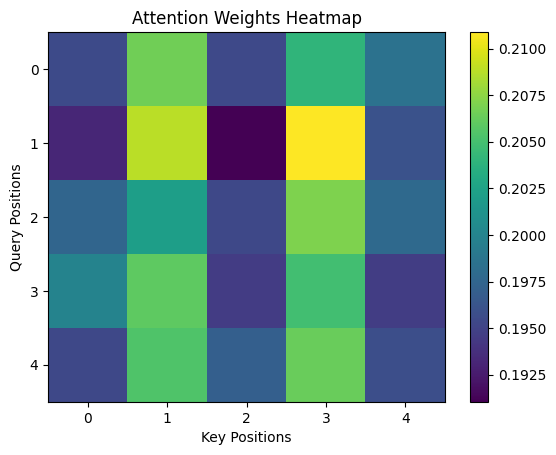

In [2]:
import matplotlib.pyplot as plt

# Visualize attention weights
plt.imshow(attn_weights.detach().numpy()[0], cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Attention Weights Heatmap')
plt.xlabel('Key Positions')
plt.ylabel('Query Positions')
plt.show()

#### 3. Enhanced Model Flexibility and Power
**Conceptual Explanation:**
By allowing each head to potentially learn to focus on different types of information (e.g., one head focusing on positional information, another on contextual relevance), Multi-Head Attention increases the flexibility of the model. This capability enables the Transformer to adapt more readily to a variety of tasks without needing significant architectural changes. For instance, the same Transformer architecture can be fine-tuned for both language understanding and translation tasks, showcasing its versatility.

**Code Snippet for Flexibility Demonstration:**

In [3]:
# Assuming 'output' is from the MultiheadAttention call above
transformed_output = torch.nn.Linear(512, 512)(output)
print("Transformed Output Shape:", transformed_output.shape)

Transformed Output Shape: torch.Size([5, 1, 512])


This versatility is crucial for applications in which the nature of the dependencies can vary significantly, such as switching between different languages or dialects in translation tasks, or varying the response style in conversational agents.

### Why We Needed the Transformer

#### 1. **Efficiency in Training**
**Deeper Explanation:**
Traditional sequence models like RNNs and LSTMs process data one element at a time and rely on the computation of the previous step to proceed. This sequential processing inherently limits the parallelization of computations, leading to longer training times especially as the sequence length increases. Moreover, these models often suffer from efficiency bottlenecks, particularly in the context of backpropagation through time, where gradients must be calculated across each timestep sequentially.

**Transformer's Impact:**
The Transformer model revolutionizes this approach by using attention mechanisms that process all elements of the input data simultaneously. This structure enables much higher degrees of parallelization during training. For instance, the Transformer can utilize modern GPU architectures to perform multiple operations concurrently, dramatically reducing the time required for model training and experimentation.

#### 2. **Handling Long-Range Dependencies**
**Deeper Explanation:**
In sequence modeling, "long-range dependencies" refer to the need for understanding relationships between elements of the input that are far apart in the sequence. Traditional models often struggle with this, as the effect of an input on a distant position in the sequence diminishes exponentially, a phenomenon known as the "[vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem)." This is exacerbated in deeper networks or longer sequences where backpropagation fails to maintain effective gradient flow.

**Transformer's Impact:**
The self-attention mechanism in the Transformer directly calculates the interaction between each pair of positions in a sequence, regardless of their distance. By doing so, it maintains a constant path length between any two positions in the input data, ensuring that learning dependencies, regardless of distance, are equally feasible. This capability significantly improves the model’s ability to make sense of data where distant elements influence each other, like in many natural language contexts.

#### 3. **Scalability**
**Deeper Explanation:**
Scalability in machine learning models refers to the ability to maintain or improve performance as the size of the dataset increases. RNNs and even CNNs, when applied to sequence tasks, face challenges scaling with increased data and complexity due to their computational and memory inefficiencies.

**Transformer's Impact:**
The design of the Transformer, devoid of recurrence, relies entirely on self-attention to compute outputs. This architecture is inherently more scalable, both in terms of handling larger datasets and in deploying more complex models. Its ability to process all input data in parallel allows it to handle significantly larger sequences without a corresponding blowup in computational requirements. Additionally, the Transformer's architecture is flexible, enabling it to be used in various configurations and for different tasks without substantial modifications.

### Summary
In summary, the Transformer model addresses critical inefficiencies in previous sequence modeling approaches with its innovative use of parallel processing and self-attention. This paradigm shift not only enhances training efficiency and the handling of long-range dependencies but also provides a scalable architecture capable of adapting to the increasing demands of modern computational resources and the growing size and complexity of datasets. These advantages make the Transformer a cornerstone in the development of models for a wide range of applications in natural language processing and beyond.

---

**Application Examples**
   - **Simple Translation Task**
     - Use a pre-trained Transformer model on a simple sentence translation to see the architecture in action.
   - **Visualization of Attention**
     - Visualize the attention maps from a given example to show how the model focuses on different parts of the input sequence.

### Starting Points for Coding Examples

#### Scaled Dot-Product Attention




In [4]:
import torch
import torch.nn.functional as F

def scaled_dot_product_attention(query, key, value):
    dk = query.size()[-1]  # Dimension of the key
    scores = torch.matmul(query, key.transpose(-2, -1)) / (dk ** 0.5)
    attention_weights = F.softmax(scores, dim=-1)
    output = torch.matmul(attention_weights, value)
    return output, attention_weights

# Example tensors for query, key, value
query = torch.randn(1, 10, 64)  # (batch_size, seq_length, dk)
key = torch.randn(1, 10, 64)
value = torch.randn(1, 10, 64)

output, attention_weights = scaled_dot_product_attention(query, key, value)
print("Output:", output)
print("Attention Weights:", attention_weights)

Output: tensor([[[-5.9883e-02, -1.6865e-01, -5.7861e-01, -1.1788e+00, -7.8402e-02,
          -3.0809e-01,  4.9130e-01, -1.3783e-02,  7.5919e-03, -7.8483e-02,
          -3.5821e-01,  5.3744e-01,  5.4242e-01, -1.3974e-01, -1.4475e-01,
           5.1221e-01, -3.5535e-01,  8.0553e-02,  1.7228e-01, -1.4737e-01,
           8.6538e-01,  3.8280e-02, -6.6751e-02,  6.2245e-01, -1.3433e-01,
          -7.6317e-02, -6.2944e-03,  1.8341e-01, -7.8553e-02, -2.2671e-01,
          -2.3396e-01, -1.8387e-01,  7.4973e-01,  3.1143e-01,  5.8897e-01,
          -3.9350e-01,  6.4028e-02, -1.4126e-01,  4.4565e-02, -2.4443e-01,
           4.4929e-01, -1.9304e-01, -4.0434e-01, -7.2598e-02,  3.3783e-02,
           4.6116e-01, -3.2513e-01,  7.0766e-01,  2.5012e-01,  6.6588e-01,
          -8.9783e-02, -1.5620e-01,  4.2821e-01, -4.1738e-01,  6.1046e-02,
          -5.7416e-01,  2.2550e-01, -4.8097e-01,  1.9979e-01, -2.5229e-01,
           4.2422e-01, -8.6357e-02,  2.7152e-01,  2.3270e-01],
         [ 1.1243e-01,  3.963

The output of this code snippet consists of two main components: `output` and `attention_weights`, both resulting from the scaled dot-product attention mechanism implemented in our function. Here’s what each part signifies and tells us about the processed data:

### Output
The `output` tensor is a result of applying attention to the `value` based on the computed attention scores from `query` and `key`. This is the primary outcome of the attention mechanism where each element in the output represents a weighted sum of the `value` vectors, with weights provided by the attention scores. Here's what this tells us:

- **Dimensionality**: The shape of the `output` is similar to the input `query`, which in our example is `(1, 10, 64)`. This means for each query vector, you have an output vector of the same dimensionality.
- **Content**: Each vector in the `output` tensor is a combination of the `value` vectors, where the combination coefficients are determined by how well each `key` matched the corresponding `query`. This allows the model to focus on the most relevant parts of the input data (as determined by the attention mechanism), which is crucial for tasks like **translation or summarization** where relevance can vary greatly across the sequence.

### Attention Weights
The `attention_weights` tensor represents the normalized scores (via softmax) that quantify the importance assigned to each element of the sequence when forming the output. In simpler terms, these weights show how much attention the model pays to each part of the input sequence when computing the output. Here’s what the `attention_weights` tell us:

- **Shape**: The shape of `attention_weights` is `[1, 10, 10]` in our example, indicating each of the 10 query vectors computes attention scores relative to each of the 10 key vectors.
- **Interpretation**: 
  - Each row in the `attention_weights` matrix corresponds to a different query.
  - Each column in a particular row shows the weight given to each key when calculating the output vector for that specific query.
  - High values indicate more attention was paid to that specific key when constructing the output, suggesting higher relevance or importance.

### Visualization and Interpretation Example
Visualizing these attention weights can be highly informative, as it provides insights into what parts of the input sequence the model finds relevant when making predictions or transformations. Here's a small code snippet that you can add to visualize the attention matrix:

This heatmap can help debug and understand the model’s focus across different parts of the input sequence, adding a layer of interpretability to the inherently complex attention mechanisms. This visualization can especially be useful when you want to explain or present how the attention mechanism is leveraging different parts of the input data differently, which is pivotal for tasks involving context-sensitive information processing like natural language understanding or generative tasks.

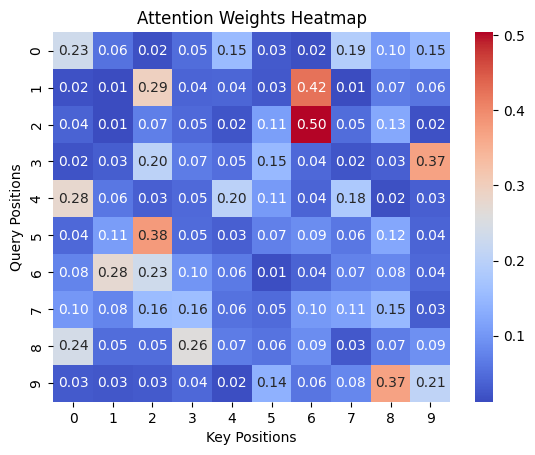

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(attention_weights[0].detach().numpy(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Attention Weights Heatmap")
plt.xlabel("Key Positions")
plt.ylabel("Query Positions")
plt.show()

The range of layers you can switch between in a Transformer model like BERT depends on the specific configuration of the model. For the standard BERT models provided by Hugging Face, here are the typical configurations:

- **BERT-Base**: 12 layers (or transformer blocks), each with 12 attention heads.
- **BERT-Large**: 24 layers, each with 16 attention heads.

Each layer can independently compute attention, and each head within a layer focuses on different aspects of the input data. To switch between these layers and visualize their respective attention weights, you would adjust the indices used to access the `attention_weights` in your code.

### Example
Since we are using BERT-Base and want to visualize the attention weights from different layers, you would select a layer index from 0 to 11 (since there are 12 layers, and Python uses 0-based indexing). Here is how you might write the code to visualize attention from different layers:

This allows you to visually compare how attention is distributed differently across various layers and heads, providing insights into what each part of the model focuses on at different stages of processing.

In [28]:
# Output the total number of layers returning attention data
print("Number of layers with attention data:", len(attention_weights))

# Optionally, check the shape of attention weights for the first available layer and head
if len(attention_weights) > 0 and len(attention_weights[0]) > 0:
    print("Shape of attention weights for the first layer and head:", attention_weights[0][0].shape)
else:
    print("No attention data available!")


Number of layers with attention data: 1
Shape of attention weights for the first layer and head: torch.Size([10])


#### Positional Encoding




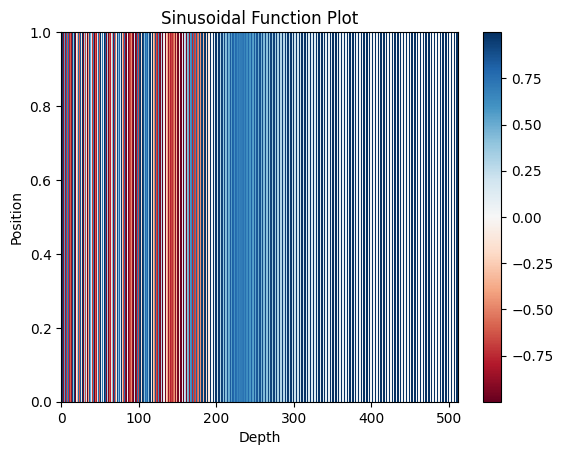

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def positional_encoding(position, d_model):
    angle_rates = 1 / np.power(10000, (2 * (np.arange(d_model)[np.newaxis, :] // 2)) / np.float32(d_model))
    angle_rads = position * angle_rates
    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    pos_encoding = angle_rads[np.newaxis, ...]
    return torch.tensor(pos_encoding)

pos_encoding = positional_encoding(50, 512)  # 50 positions, 512 dimensions
plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.title("Sinusoidal Function Plot")
plt.show()

### Next Steps

- Begin with the Introduction and Architecture Breakdown, integrating explanations, diagrams, and references to the seminal paper.
- Progress to implementing and explaining the math and code sections.
- Conclude with practical applications and visualizations to demonstrate the theory in action.


### Step-by-Step Guide to Visualize Text Processing Through a Transformer

Visualizing how a specific element, like a letter, word, or sentence, progresses through a Transformer model can provide deep insights into how the model processes natural language. This can be especially useful for educational purposes, debugging, or improving model interpretability. 

#### 1. Preparing the Text and Model
To start, you'll need a text input and a Transformer model. For demonstration, let's use a pretrained model like BERT from the Hugging Face Transformers library, which is widely used and supports various natural language processing tasks.

In [18]:
from transformers import BertTokenizer, BertModel

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', clean_up_tokenization_spaces=True)

# Encode text
text = "The quick brown fox jumps over the lazy dog"
encoded_input = tokenizer(text, return_tensors='pt')

# Load pre-trained model with eager attention implementation
model = BertModel.from_pretrained('bert-base-uncased', attn_implementation="eager")



Let's break down the code snippet and explore what each line does, specifically how it interfaces with the BERT model using the Hugging Face Transformers library. This library simplifies the use of pretrained models for a variety of NLP tasks.

### Code Breakdown

1. **Importing the Library:**
   ```python
   from transformers import BertTokenizer, BertModel
   ```
   This line imports `BertTokenizer` and `BertModel` from the Hugging Face `transformers` package. `BertTokenizer` is used for converting text into a format suitable for the BERT model, while `BertModel` is the actual BERT model pre-trained on a large corpus.

2. **Loading the Pre-trained Tokenizer:**
   ```python
   tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
   ```
   Here, `BertTokenizer.from_pretrained('bert-base-uncased')` loads a pre-trained tokenizer. This tokenizer is specifically for the "base" version of BERT that uses uncased text, meaning it does not distinguish between uppercase and lowercase letters (e.g., "hello" is the same as "HELLO").

3. **Encoding the Text:**
   ```python
   text = "The quick brown fox jumps over the lazy dog"
   encoded_input = tokenizer(text, return_tensors='pt')
   ```
   - `text` is a string containing the sample sentence to be processed by BERT.
   - `tokenizer(text, return_tensors='pt')` converts the text into a format that the BERT model can process:
     - **Tokenization**: Splits the text into tokens that can be mapped to BERT's vocabulary.
     - **Add special tokens**: Adds `[CLS]` at the beginning and `[SEP]` at the end of sentences. `[CLS]` is used for classification tasks, and `[SEP]` separates sentences for tasks that involve multiple inputs.
     - **Convert to IDs**: Converts each token to its corresponding ID in BERT’s vocabulary.
     - **return_tensors='pt'**: Specifies that the output should be PyTorch tensors.

4. **Loading the Pre-trained BERT Model:**
   ```python
   model = BertModel.from_pretrained('bert-base-uncased')
   ```
   This line loads the pre-trained BERT model (again specifying the "base" version with uncased text). The model comes with weights that have been pre-trained on the BookCorpus and English Wikipedia data.

### Viewing the Variables

To better understand what's inside the `encoded_input` and how the model can be interacted with, you can print or inspect these variables:

```python
print(encoded_input)
```

This will display the dictionary-like object containing the input IDs and attention mask. The input IDs are the numerical representations of the tokens, and the attention mask indicates to the model which tokens should be paid attention to (non-zero values) and which should not (zero values, for padding).

Here's an example of how you might display parts of the encoded input:

```python
# Display tokenized text
print(tokenizer.convert_ids_to_tokens(encoded_input['input_ids'][0]))

# Inspecting the shape of the input IDs
print("Shape of input_ids:", encoded_input['input_ids'].shape)
```

This code will print the tokens corresponding to the input IDs and show the shape of the `input_ids` tensor, providing insights into how many tokens are in the input and the dimensions of the input tensor.

Exploring these details can help you understand the preprocessing that's necessary for using BERT and how input text is transformed into a format suitable for deep learning models. If you'd like to see more details or explore specific aspects of the model's output or internals, let me know!

In [19]:
print(encoded_input)

{'input_ids': tensor([[  101,  1996,  4248,  2829,  4419, 14523,  2058,  1996, 13971,  3899,
           102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


The output you're seeing from the `print(encoded_input)` command represents the structured data that BERT requires to process the input text. Here's a breakdown of each component in this dictionary:

### Components of `encoded_input`

1. **`input_ids`**:
   - **Description**: This tensor contains the numerical representations of each token in your input text. The tokenizer has converted each word (and special tokens) into an ID that corresponds to an entry in BERT's vocabulary.
   - **Example**: `[[  101,  1996,  4248,  2829,  4419, 14523,  2058,  1996, 13971,  3899, 102]]`
     - `101` and `102` are special tokens. `101` represents `[CLS]`, which is used at the start of every sequence for tasks like classification. `102` represents `[SEP]`, which marks the end of a sequence or separates segments within a sequence.
     - The other numbers are tokens for "The quick brown fox jumps over the lazy dog".

2. **`token_type_ids`**:
   - **Description**: This tensor is used to differentiate different sequences within the same input, which is useful for tasks that involve multiple separate sequences (e.g., question answering where the input might contain both a question and a passage). 
   - **Example**: `[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]`
     - All zeros indicate that all tokens belong to the same sequence. If there were a second sequence, it would start with `1s` from the position where the second sequence begins.

3. **`attention_mask`**:
   - **Description**: This tensor tells the model which tokens should be attended to and which should not. This is particularly important for sequences that have been padded to a fixed length. The attention mask helps the model ignore the padding during training or inference.
   - **Example**: `[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]`
     - All ones indicate that all tokens in your sequence should be attended to by the model. If there were padded tokens, they would be represented by `0s` in the mask, signaling the model to ignore them.

### Understanding the Output

When you input a sequence like "The quick brown fox jumps over the lazy dog" into the tokenizer, it does the following:

- **Adds Special Tokens**: `[CLS]` at the beginning and `[SEP]` at the end to mark the boundaries of the sequence.
- **Converts Words to IDs**: Each word is converted into a unique ID. These IDs are used by the model to look up the embeddings and perform further processing.
- **Creates Token Type IDs**: Since your example doesn't have multiple segments, all token type IDs are `0`.
- **Generates an Attention Mask**: This indicates to the model that none of the tokens are padding, and all should be considered in processing.

This structured format ensures that BERT can correctly interpret and process the input text according to the model's pre-training, which involves understanding token relationships and contextual meanings based on these IDs and masks.

In [20]:
print(tokenizer.convert_ids_to_tokens(encoded_input['input_ids'][0]))

['[CLS]', 'the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '[SEP]']


The output you're seeing from the `print(tokenizer.convert_ids_to_tokens(encoded_input['input_ids'][0]))` command is the result of converting the numerical `input_ids` back into readable tokens using the BERT tokenizer. Here’s a detailed breakdown of what each part of the output represents:

### Output Breakdown

- **`['[CLS]', 'the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '[SEP]']`**:
  - **`[CLS]`**: This is a special token added at the beginning of each sequence. For BERT, this token is used primarily in classification tasks as a placeholder for the entire sequence's representation. The output of the model corresponding to this token is often used as the aggregate sequence representation for classification tasks.
  
  - **`'the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog'`**: These are the tokens corresponding to each word in your input sentence "The quick brown fox jumps over the lazy dog". Each word is tokenized separately, and they appear in the sequence exactly as they occur in the sentence.
  
  - **`[SEP]`**: This is another special token that is used by BERT to denote the end of a sequence. In scenarios where there are multiple sequences (like in question-answering tasks where you have both a question and a context passage), this token is also used to separate different sequences within the same input.

### Purpose of Each Token

- **`[CLS]` (Classifier Token)**: As mentioned, it's primarily used for tasks that require a single summary representation of the entire sequence, such as sentiment analysis or any other form of sequence classification.

- **Regular tokens (`the`, `quick`, etc.)**: Each of these represents a word from the input sentence. BERT has been pre-trained to understand the contextual relationships between these words based on their positions and surrounding words in large corpora. This training allows BERT to generate contextually rich embeddings for each token.

- **`[SEP]` (Separator Token)**: This token serves multiple roles. It indicates the end of a sequence and is used to separate multiple sequences within a single input. This is crucial for tasks that involve understanding the relationships between separate sentences or segments, such as determining whether two sentences are logically connected.

### Significance in BERT Processing

The use of `[CLS]` and `[SEP]` tokens is integral to how BERT processes inputs and understands context. These tokens help BERT apply its pre-trained knowledge effectively to downstream tasks by providing clear markers of the beginning, end, and separation of textual data. This structured approach enables BERT to adapt to a wide range of language understanding tasks with minimal task-specific adjustments.

In [21]:
print("Shape of input_ids:", encoded_input['input_ids'].shape)

Shape of input_ids: torch.Size([1, 11])


The output `torch.Size([1, 11])` from your command `print("Shape of input_ids:", encoded_input['input_ids'].shape)` tells you about the dimensions of the `input_ids` tensor that was produced by the BERT tokenizer. Let's break down what this shape information means:

### Understanding `torch.Size([1, 11])`

1. **`1`**: The first dimension in the tensor shape, which is `1`, represents the batch size. This indicates that there is one sequence in this batch. In machine learning, especially in models designed to handle multiple sequences at once, inputs are often processed in batches for efficiency. Even if you are only processing a single sequence, it needs to be wrapped in a batch of size one.

2. **`11`**: The second dimension, which is `11`, represents the number of tokens in the sequence, including the special tokens added by the tokenizer. For the input text "The quick brown fox jumps over the lazy dog", the tokenizer adds a `[CLS]` token at the beginning and a `[SEP]` token at the end, resulting in the following tokens:

   - `[CLS], the, quick, brown, fox, jumps, over, the, lazy, dog, [SEP]`

   This breakdown confirms that there are indeed 11 tokens total, which matches the length indicated by the shape of the tensor.

### Implications of `input_ids` Shape

- **Model Input Requirements**: The shape `[1, 11]` fits the expected input structure for BERT, which requires input tensors to have dimensions `[batch_size, sequence_length]`. Each element of this tensor must be an integer representing a token ID from BERT’s vocabulary.

- **Preparation for Model**: When this tensor is passed to the BERT model, the model will use it to look up corresponding embeddings for each token ID. These embeddings are then processed through multiple layers of the Transformer architecture to generate contextualized representations of each token.

- **Utility in NLP Tasks**: The output of the BERT model can be used for various NLP tasks, depending on the model configuration and the additional layers you might add (e.g., a classification layer for sentiment analysis, a sequence labeling head for named entity recognition, etc.).

### Usage in Practical Scenarios

In a real-world application, you might process texts of varying lengths, which would result in different `sequence_length` values for different inputs. It's important to note that most Transformer models, including BERT, have a maximum sequence length (often 512 tokens for BERT). If your input exceeds this length, it will need to be truncated or split into manageable segments.

This structure and format enable BERT and similar models to handle and process text data efficiently, leveraging the power of deep learning for complex language understanding tasks.

#### 2. Model Forward Pass
Perform a forward pass to get the outputs. Since BERT is a complex model comprising multiple layers of Transformers, you'll get outputs for each layer which you can then visualize.

In [22]:
# Forward pass, output hidden states
outputs = model(**encoded_input, output_hidden_states=True)
hidden_states = outputs.hidden_states

This snippet demonstrates how to perform a forward pass through a BERT model using PyTorch and the Hugging Face Transformers library, capturing hidden states at each layer of the model. Here’s an expanded explanation of each component and what it accomplishes:

### Code Breakdown

#### Forward Pass Through the BERT Model

```python
outputs = model(**encoded_input, output_hidden_states=True)
```

- **`model(**encoded_input)`**: This part of the code performs the forward pass. `**encoded_input` unpacks the dictionary containing `input_ids`, `token_type_ids`, and `attention_mask` directly into the model's input parameters. These inputs were prepared by the tokenizer and are formatted specifically for compatibility with the BERT model. 

- **`output_hidden_states=True`**: This parameter tells the model to return all hidden states. In a Transformer model like BERT, each layer generates a new representation of the input data. By setting this parameter to `True`, you're instructing the model not only to provide the final output but also to retain the intermediate representations (hidden states) at each layer of the model.

### What are Hidden States?

- **Hidden States**: These are the outputs from each layer of the Transformer model. For BERT, which is typically composed of multiple layers (12 in BERT-Base and 24 in BERT-Large), each layer outputs a tensor representing the transformed input as it passes through that specific layer. These outputs are crucial for understanding how input data (tokens) are gradually transformed and refined into embeddings that encapsulate contextual relationships.

### Output Structure

- **`hidden_states`**: After the forward pass, `hidden_states` is a tuple where each element corresponds to the output from one of the Transformer layers, including the initial embeddings layer (making it the number of layers + 1 in total). If using BERT-Base, `hidden_states` will contain 13 elements (1 for embeddings and 12 for each Transformer layer).

#### Accessing the Hidden States

```python
hidden_states = outputs.hidden_states
```

- This line extracts the `hidden_states` from the `outputs`. These hidden states can be used for further analysis or visualization to understand how information is processed through the model's architecture. For instance, researchers and developers often examine these hidden states to explore how different layers capture syntactic and semantic aspects of the input text.

### Practical Uses of Hidden States

- **Feature Extraction**: Hidden states can be used as features in downstream tasks. For example, you might use the output of the last layer (or a combination of several layers) as a feature vector for classification tasks.
  
- **Model Interpretation and Visualization**: By examining the hidden states, especially how they evolve from the input layer to deeper layers, one can gain insights into what each layer of the model focuses on when processing an input.

- **Fine-tuning and Model Adjustments**: Understanding the transformations at each layer can help in fine-tuning the model more effectively or adjusting the model architecture based on specific needs.

This detailed walkthrough of the forward pass and hidden states should help you leverage BERT's outputs effectively, whether for building applications or conducting detailed analysis and research on the inner workings of Transformer models.

In [23]:
print(outputs)

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.2868,  0.1967, -0.0303,  ..., -0.2393,  0.3903,  0.4083],
         [-0.6393, -0.2591, -0.4164,  ..., -0.2530,  1.1479, -0.3032],
         [-0.3497, -0.4341,  0.5933,  ..., -0.2183,  0.6791, -0.0826],
         ...,
         [-0.0914, -0.0500,  0.7479,  ...,  0.0531,  0.4767, -0.3529],
         [-0.0828, -0.2002, -0.3023,  ...,  0.2069,  0.4923,  0.3746],
         [ 0.6506,  0.0668, -0.5612,  ...,  0.0133, -0.4342, -0.2006]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-7.3332e-01, -2.2354e-01,  3.4246e-01,  3.8346e-01, -1.6479e-01,
          4.0522e-02,  8.0285e-01,  1.5284e-01,  3.3164e-01, -9.9978e-01,
          3.3707e-01,  3.2119e-03,  9.8375e-01, -3.0596e-01,  9.0910e-01,
         -3.3512e-01,  2.0530e-01, -4.3000e-01,  1.3902e-01, -5.3936e-01,
          5.9786e-01,  9.4928e-01,  6.5556e-01,  1.1450e-01,  2.7238e-01,
          1.3816e-01, -4.0135e-01,  8.9970e-01,  9.2909e-01,  7.177

The output of the `print(outputs)` command shows the result of running your input through a BERT model using the Hugging Face Transformers library. The `outputs` object contains several elements that are packed into a `BaseModelOutputWithPoolingAndCrossAttentions` data structure. Here’s a breakdown of what each part of this output means:

### Components of `BaseModelOutputWithPoolingAndCrossAttentions`

1. **`last_hidden_state`**: This tensor contains the output features from the last layer of the model for each token in the input sequence. The dimensions of this tensor are typically `[batch size, sequence length, hidden size]`. In the context of BERT:
   - `batch size` is the number of input examples processed simultaneously (1 in your case).
   - `sequence length` is the number of tokens in the input sequence (including special tokens like `[CLS]` and `[SEP]`).
   - `hidden size` is the dimensionality of the output feature vector from each transformer layer, which is 768 for `bert-base-uncased`.
   - The values in this tensor represent the contextual embeddings for each input token, which have been adjusted through multiple layers of the Transformer architecture.

2. **`pooler_output`**: This is a tensor derived from the hidden state of the first token of the sequence (the `[CLS]` token) after passing it through a dense layer and a `tanh` activation function. This output is designed to capture the essence of the entire sequence and is typically used for classification tasks. The dimension here is `[batch size, hidden size]`, reflecting pooled output features that summarize the input sequence.

3. **`hidden_states`**: If the model is run with `output_hidden_states=True`, this tuple will contain the hidden states at the output of each layer of the Transformer, plus the initial embedding outputs. This is useful for detailed analyses that require understanding how representations evolve across the model. Each tensor in the tuple has the dimensions `[batch size, sequence length, hidden size]`.

### Additional Outputs

- **`past_key_values`**: This would contain the key and value states used by the self-attention heads, applicable for models like GPT that support incremental state updates. For BERT, this is typically not used.
- **`attentions`**: If the model is configured to output attentions, this will contain the attention probabilities from each layer of the model. These indicate how each token weighted other tokens across the sequence during the attention operations.
- **`cross_attentions`**: Similar to `attentions`, but specifically for models that perform cross-attention between different sequences (not used in standard BERT).

### Understanding the Output

The `print(outputs)` output shows the computational results at various stages within the model, useful for debugging, model interpretation, or further downstream tasks. Each component helps to understand different aspects of the model's processing:
- **`last_hidden_state`** gives a comprehensive embedding for each token, reflecting its context within the input sequence.
- **`pooler_output`** provides a summary of the sequence that can be directly used for sequence-level classification tasks.
- **`hidden_states`** offer a way to analyze or visualize the evolution of token embeddings through the model, which can be crucial for research or fine-tuning strategies.

These outputs collectively provide a detailed picture of how the input text is processed and represented within the BERT model, enabling a wide range of NLP applications.

In [24]:
print(hidden_states)

(tensor([[[ 0.1686, -0.2858, -0.3261,  ..., -0.0276,  0.0383,  0.1640],
         [-0.4367,  0.5360, -0.0514,  ..., -0.0397,  0.6783, -0.5318],
         [ 0.0764, -1.3345, -0.1239,  ..., -0.5126,  1.4597, -0.7255],
         ...,
         [-0.0518, -0.1153, -0.4917,  ...,  0.2986, -0.0025, -0.9786],
         [ 0.1607,  0.6326,  0.2689,  ..., -0.1402, -0.0652,  0.7059],
         [-0.4439, -0.0201,  0.0074,  ..., -0.1196,  0.2850,  0.0893]]],
       grad_fn=<NativeLayerNormBackward0>), tensor([[[ 0.1909,  0.0500, -0.1415,  ...,  0.0321, -0.0161,  0.1580],
         [-0.1751,  0.2307, -0.1886,  ...,  0.0753,  0.3338, -1.0670],
         [-0.2886, -1.5222, -0.2298,  ..., -0.4424,  1.0340, -0.8566],
         ...,
         [-0.1782, -0.1606, -0.7363,  ...,  0.5873, -0.4248, -1.4554],
         [ 0.6424,  0.5058,  0.2191,  ..., -0.5321, -0.5416,  0.6986],
         [-0.1671,  0.3252,  0.0218,  ..., -0.1888,  0.5393,  0.0068]]],
       grad_fn=<NativeLayerNormBackward0>), tensor([[[ 0.0623, -0.0801,

The `hidden_states` you are seeing as part of the output from running a BERT model represent the internal states of the model at each layer for the given input sequence. These are essentially the outputs of each Transformer layer inside BERT before any final task-specific layers are applied. Let's delve into what this means:

### Understanding `hidden_states`

1. **Tensor Composition**: Each tensor in `hidden_states` is of the shape `[batch size, sequence length, hidden size]`, where:
   - `batch size` is the number of input sequences being processed together (1 in your case).
   - `sequence length` includes all tokens (words and special tokens) processed by the model.
   - `hidden size` is the size of the model’s internal state (768 dimensions for BERT-base).

2. **Layer-wise Representation**:
   - Each element of the `hidden_states` tuple corresponds to the output from one of the Transformer layers within BERT.
   - The first tensor in the tuple corresponds to the output from the embedding layer (plus any initial transformations applied).
   - Subsequent tensors represent the output states after each Transformer layer. For `bert-base-uncased`, there are 12 layers, so you will get 13 tensors in total (1 for the embedding outputs, and 12 for each Transformer layer).

3. **Data Interpretation**:
   - Each vector in these tensors is a contextual representation of the corresponding token in the input sequence. This means that the vector for a token like "dog" contains information about "dog" in the context of its surrounding words in the sentence.
   - As you move from the first to the last tensor in `hidden_states`, the representations evolve. Early layers capture more syntactic aspects, while deeper layers increasingly reflect semantic and task-specific features.

### Practical Use:
- **Feature Extraction**: These hidden states can be used as features for various downstream tasks like text classification, entity recognition, etc. Sometimes, outputs from specific layers or combinations of layers give the best performance for particular applications.
- **Model Interpretation and Analysis**: By examining these states, especially how they change from layer to layer, you can gain insights into what aspects of the data the model is focusing on at each stage of processing. This can be particularly useful for research and understanding model behavior.

In summary, `hidden_states` provide a rich, layer-by-layer unfolding of how BERT processes and transforms its input text into increasingly abstract and powerful representations. This detailed view into the model's internal workings can be instrumental for advanced analysis and custom applications beyond simple end-task performance.

#### 3. Visualizing Attention Weights
To visualize how attention is distributed across different words, you can extract and visualize the attention weights. Hugging Face’s models allow you to output attention weights directly.

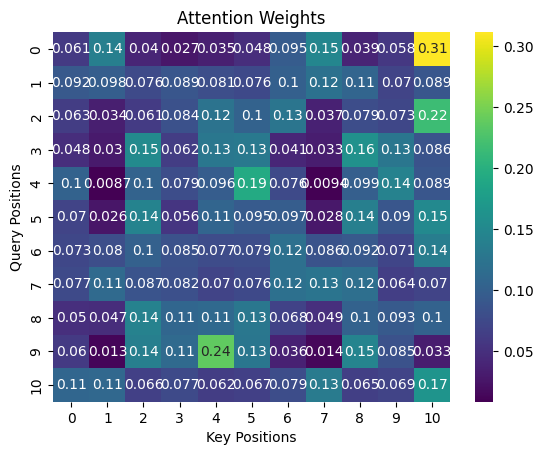

In [25]:
# Forward pass, output attention weights
outputs = model(**encoded_input, output_attentions=True)
attentions = outputs.attentions  # Tuple of attention weights from each layer

# Let's visualize the attention from the first layer
attention = attentions[0][0, 0].detach().numpy()  # First layer, first head, first example

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(attention, annot=True, cmap='viridis')
plt.title("Attention Weights")
plt.xlabel("Key Positions")
plt.ylabel("Query Positions")
plt.show()

The code block you provided is intended to visualize the attention weights from a BERT model's first layer to better understand how the model focuses on different parts of the input sentence during its processing. Let's break down the code:

### Code Explanation

1. **Model Forward Pass with Attention Weights:**
   - `outputs = model(**encoded_input, output_attentions=True)`:
     This line performs a forward pass through the model using the `encoded_input` and requests that the model outputs the attention weights as well. The `output_attentions=True` argument tells the model to retain and return the attention weights used in each of the Transformer's attention heads.

2. **Extracting Attention Weights:**
   - `attentions = outputs.attentions`:
     Here, `attentions` is a tuple containing the attention weights from each layer of the model. Each item in the tuple corresponds to the attention weights from one Transformer layer.

3. **Selecting Specific Attention Weights:**
   - `attention = attentions[0][0, 0].detach().numpy()`:
     This line accesses the first item of the tuple (weights from the first layer), and selects the first head's attention weights for the first example in the batch. The `.detach().numpy()` part converts the tensor to a NumPy array after detaching it from the gradient computation graph, making it easier to handle in standard Python environments.

4. **Visualization Using Seaborn:**
   - `sns.heatmap(attention, annot=True, cmap='viridis')`:
     This uses Seaborn's heatmap function to visualize the attention weights. The `annot=True` parameter annotates the heatmap with the actual numerical values of the attention weights, and `cmap='viridis'` sets the color map style.

### Plotting Attention Weights
The plot you generated (and as seen in the uploaded image) shows the attention pattern where rows represent query positions (words in the input sequence to which attention is being paid) and columns represent key positions (words in the input sequence that are being attended to). This heatmap gives a visual representation of how attention is distributed across the input, indicating which words the model focuses on when processing each word in the sequence.

#### 4. Visualizing Word Embeddings Transformation
To visualize how the embedding of a word evolves through the layers, select the embeddings for a specific token from each layer’s output and plot them.

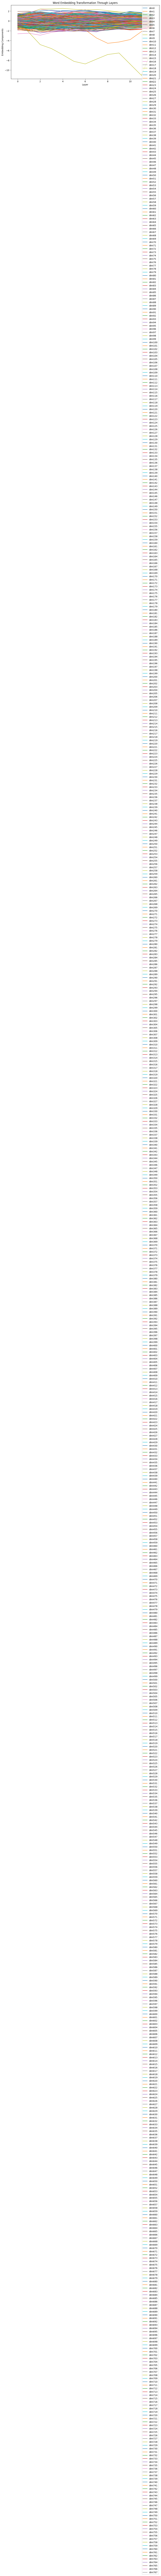

In [10]:
import numpy as np

# Choose a token to visualize, e.g., "fox" at position 4
token_idx = 4
token_embeddings = np.array([layer[0, token_idx].detach().numpy() for layer in hidden_states])

plt.figure(figsize=(12, 6))
plt.plot(token_embeddings)
plt.title('Word Embedding Transformation Through Layers')
plt.xlabel('Layer')
plt.ylabel('Embedding Components')
plt.legend(['dim'+str(i) for i in range(token_embeddings.shape[1])], loc='upper right')
plt.show()

#### 5. Comprehensive Visualization
For a more detailed analysis, you might want to use tools like **TensorBoard** or **BERTViz** which are designed to visualize Transformer architectures. These tools can help you visualize not just the attention or embeddings but also how different layers interact and contribute to the final decision.

### Conclusion
Visualizing how different elements of input text are processed by a Transformer model can be incredibly informative. It allows you to see which parts of the input are considered important by the model, how information flows through the model, and how different layers contribute to understanding the input. This can be crucial for improving model design, interpreting model decisions, and even for educational purposes to explain how Transformers work.